# 텍스트 마이닝

## 목차
- [텍스트 마이닝의 이해](#paragraph1)
- [텍스트 마이닝 방법론](#paragraph2)
- [텍스트 마이닝의 문제점](#paragraph3)
- [문제 해결을 위한 방안](#paragraph4)
- [텍스트 마이닝 실습](#paragraph5)

## 텍스트 마이닝의 이해 <a name="paragraph1"></a>

### 텍스트 마이닝이란

텍스트 마이닝(text mining)은 언어학, 통계학, 기계 학습 등을 기반으로 한 자연언어 처리 기술을 활용하여 반정형 및 비정형 텍스트 데이터를 정형화하고, 특징을 추출하기 위한 기술과 추출된 특징으로부터 의미 있는 정보를 발견할 수 있도록 하는 기술이다.
<br>(출처: [해시넷](http://wiki.hash.kr/index.php/%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D))

<br>

텍스트 마이닝의 주요 기술은 다음과 같다

**자연어처리**: 자연어처리 기술(NLP, Natural Language Processing)이란, 워드 임베딩과 같은 기술을 사용해 컴퓨터가 인간의 언어를 알아들을 수 있게 만드는 학문 분야이다.

**통계학, 선형대수**: 여러 통계기법들과 벡터, 행렬 연산을 통해 텍스트 데이터를 분석가능하게 변환시킨다.

**머신러닝**: 나이브 베이즈, 로지스틱 회귀분석, 의사결정트리, SVM (Support Vector Machine) 등 여러 알고리즘을 사용한다.

**딥러닝**: RNN (Recurrent Neural Network), LSTM (Long Short-Term Memory), Attention, Transformer, Bert, GPT 와 같은 딥러닝 기법을 사용한다

<br>

텍스트 마이닝은 여러 분야에서 활발하게 연구가 이뤄지고 있고 사용되고 있다.

**텍스트 분류**: 대표적으로 감성분석에 사용된다.

**텍스트 생성**: 뉴스 생성, QnA, 번역과 같은 곳에서 사용된다.

**키워드 추출**: 텍스트에 태그나 카테고리를 구분할 때 사용된다.

**토픽 모델링**: 텍스트의 특정 주제나 이슈, 주제 그룹들을 추출할 때 사용된다.

<br>

파이썬은 풍부한 라이브러리로 인해 텍스트 마이닝에 가장 많이 사용되는 언어이다. 가장 많이 알려진 NLP 라이브러리인 **NLTK**, 머신러닝 라이브러리와 기본적인 NLP와 다양한 텍스트 마이닝 관련 도구를 지원하는 **scikit learn**, Word2Vec으로 유명한 **gensim**, RNN, seq2seq 등 딥러닝 위주의 라이브러리를 제공하는 **keras** 등이 있다. 참고로 **keras**는 **tensorflow** 라이브러리의 high-level API다.

## 텍스트 마이닝 방법론 <a name="paragraph2"></a>

텍스트 마이닝은 텍스트를 벡터로 변환하는것으로 시작한다. 벡터로 변환하는데 사용되는 기술들이 있는데 같이 살펴보기로 하자.

### Tokenize

하나의 텍스트를 단어들로 분리 시켜주는 단계이다. 이때 의미 없는 문자들을 걸러낼 수도 있다. 

영어와 한글의 tokenize는 차이가 있는데 영어는 문장 구조상 단어와 단어 사이에는 공백이 존재한다. 하지만 한글은 조사와 어미 등을 구별해야하는 작업이 추가로 필요하다. 그래서 한글 텍스트 마이닝이 영어보다 더 어렵다고 알려져있다.

In [31]:
# 영어
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

text = "Thank God it's friday!"
print(word_tokenize(text))

['Thank', 'God', 'it', "'s", 'friday', '!']


In [8]:
# 한글
from konlpy.tag import Okt  
okt = Okt()

text = "애플이 2년 만에 새로운 아이패드 미니를 공개했다."
print(okt.morphs(text))

['애플', '이', '2년', '만에', '새로운', '아이패드', '미니', '를', '공개', '했다', '.']


### Text Normalization

Normalization은 정규화 라는 뜻을 가지고 있다. Text normalization이란 말그대로 단어들을 정규화 시켜준다는 것인데, 같은 의미의 단어가 다른 형태를 가지고 있는 경우 이를 같은 형태로 변환시켜주는 것이다. 그럼 어떻게 텍스트를 정규화 시킬 수 있을까? 바로 Stemming 과 lemmatization 기법이 사용된다. 

**Stemming**

어간(stem) 추출이라고도 하고 단수-복수, 현재형-미래형 등 단어의 다양한 변형을 하나로 통일하는 기법이다. 이때 단어의 의미가 아닌 규칙(알고리즘)에 의해 변환시킨다. Porter stemmer와 Lancaster stemmer가 유명하다.

In [13]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize

In [22]:
def stem_sentence(sentence):
    token_words = word_tokenize(sentence)
    token_words
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(porter.stem(word))
    return " ".join(stem_sentence)

porter = PorterStemmer()
lancaster = LancasterStemmer()

sentence = '''Global investors were in the dark about whether the property giant would make $83.5 million in payments, 
a major test of the highly indebted developer’s ability to avoid a default.'''

print('Original:')
print(sentence)
print('\nStemmed:')
print(stem_sentence(sentence))

Original:
Global investors were in the dark about whether the property giant would make $83.5 million in payments, 
a major test of the highly indebted developer’s ability to avoid a default.

Stemmed:
global investor were in the dark about whether the properti giant would make $ 83.5 million in payment , a major test of the highli indebt develop ’ s abil to avoid a default .


**Lemmatization**

표제어(lemma) 추출이라고도 하고 사전을 이용하여 단어의 원형을 추출하는 기법이다. WordNet lemmatizer가 유명하다.

In [24]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cho2jiwoo/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [25]:
def lemmatize(sentence):
    token_words = word_tokenize(sentence)
    token_words
    lemmatize_sentence = []
    for word in token_words:
        lemmatize_sentence.append(wordnet_lemmatizer.lemmatize(word))
    return " ".join(lemmatize_sentence)

wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

print('Original:')
print(sentence)
print('\nLemmatized:')
print(lemmatize(sentence))

Original:
He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun.

Lemmatized:
He wa running and eating at same time . He ha bad habit of swimming after playing long hour in the Sun .


reference: https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

### POS-tagging

POS (Part of Speech) tagging, 즉 품사 태깅은 형태소의 뜻과 문맥을 고려하여 그것에 마크업을 하는 일이다.예를 들어:
<br>
`가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ다/EFN`
<br>
(출처: [KoNLPy 공식 문서](https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/))

동일한 단어라도 문맥에 따라 의미가 달라지므로 품사를 알기 위해서는 문맥을 파악해야 한다. 한글에 특수성 때문에 한글에 특화된 형태소 분석기를 사용해야 좋은 결과가 나올 수 있다. `konlpy` 패키지에는 여러 형태소 분석기가 들어있는데 예제에서는 카이스트 semantic web research center에서 만든 Hannanum을 사용해보자. 다른 형태소 분석기 들은 [이곳](https://mr-doosun.tistory.com/22)을 참고.

In [37]:
from konlpy.tag import Hannanum

hannanum = Hannanum()
sentence = '하늘을 나는 자동차'
print(hannanum.pos(sentence))

[('하늘', 'N'), ('을', 'J'), ('나', 'N'), ('는', 'J'), ('자동차', 'N')]


"하늘을 나는 자동차" 라는 문장에서 "나"를 "me"로 인식하고 명사로 태그한것을 볼 수 있다. 이 문장에서는 `나(-ㄹ다)/V + 는/E` 이 되는 것이 바람직하다.

### Chunking

Chunk는 언어학적으로 말모듬을 뜻하며, 명사구, 형용사구, 분사구 등과 같이 주어와 동사가 없는 두 단어 이상의 집합인 구(phrase)를 의미한다. Chunking은 문장에서 구(phrase)를 찾는 것이다.

In [2]:
import nltk
# nltk.download('averaged_perceptron_tagger')

text = "The little yellow dog barked at the cat"
tokens = nltk.word_tokenize(text)
tag = nltk.pos_tag(tokens)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp  = nltk.RegexpParser(grammar)
result = cp.parse(tag)
# result.draw()

![](https://www.nltk.org/book/tree_images/ch07-tree-1.png)

<div align='center'>reference: https://www.nltk.org/book/ch07.html</div>

### NER

NER(Named Entity Recognition)은 텍스트로 부터 의미 있는 정보를 추출하기 위한 방법으로 사용된다. NER에 NE는 Named Entity, 개체명이라 부르고 기관, 단체, 사람, 날짜 등과 같이 특정 정보에 해당하는 명사구를 의미한다.

In [7]:
import spacy
from spacy import displacy
# Run this command in terminal
# python -m spacy download en_core_web_sm

NER = spacy.load("en_core_web_sm")
sentence = '''European authorities fined Google a record $5.1 billion on Wednesday for 
abusing its power in the mobile phone market and ordered the company to alter its practices'''
ners = NER(sentence)
displacy.render(ners, style="ent", jupyter=True)

reference: https://www.analyticsvidhya.com/blog/2021/06/nlp-application-named-entity-recognition-ner-in-python-with-spacy/

### BOW

BOW(Bag of Words)란 단어들의 순서를 고려하지 않고, 단어들의 출현 빈도(frequency)만 가지고 vector로 표현하는 방법이다. scikit learn 라이브러리에 CountVectorizer을 사용하면 간단히 bag of words를 만들 수 있다.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


reference: https://wikidocs.net/22650

### TFIDF

TF-IDF(Term Frequency-Inverse Document Frequency)는 단어의 빈도와 역 문서 빈도를 사용하여 DTM(Document Term Matrix) 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법이다.

TF-IDF는 TF와 IDF를 곱한 값이다.

$d = 문서$
<br>
$t = 단어$
<br>
$n = 총 \ 문서 \ 수$

$tf(d, t)$ : 특정 문서 d에서의 특정 단어 t의 등장 횟수.

$df(t)$ : 특정 단어 t가 등장한 문서의 수.

$idf(d, t)$ : df(t)에 반비례하는 수.

<br>

TFIDF도 scikit learn 라이브러리를 이용해 만들 수 있다.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]

tfidfv = TfidfVectorizer().fit(corpus)
df = pd.DataFrame(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)
df

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


,0,1,2,3,4,5,6,7,8
0,0.00000,0.467351,0.000000,0.467351,0.00000,0.467351,0.00000,0.355432,0.467351
1,0.00000,0.000000,0.795961,0.000000,0.00000,0.000000,0.00000,0.605349,0.000000
2,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.57735,0.000000,0.000000


reference: https://wikidocs.net/31698

**코사인 유사도**

TFIDF를 이용하여 유사도를 계산할 수 있다. 코사인 유사도랑 두 벡터 간의 코사인 각도를 구하여 두 벡터의 유사도를 나타낼 수 있다. 코사인 유사도 값이 1에 가까울 수록 유사도가 높다고 판단할 수 있다.

코사인 유사도는 다음과 같이 구할 수 있다.

$$
similarity=cos(Θ)=\frac{A⋅B}{||A||\ ||B||}=\frac{\sum_{i=1}^{n}{A_{i}×B_{i}}}{\sqrt{\sum_{i=1}^{n}(A_{i})^2}×\sqrt{\sum_{i=1}^{n}(B_{i})^2}}
$$

![](https://wikidocs.net/images/page/24603/%EC%BD%94%EC%82%AC%EC%9D%B8%EC%9C%A0%EC%82%AC%EB%8F%84.PNG)

<div align='center'>참고: https://wikidocs.net/24603</div>

### Text Classification with BOW/TFIDF

BOW 와 TFIDF 기법으로 텍스를 벡터화 했다면 여러 classification 알고리즘들로 텍스트 분류를 할 수 있게 된다. 여러가지 알고리즘이 있지만 여기선 **Naive Bayes** 와 **Logistic regression**에 대해 알아보자.

**Naive Bayes**

나이브 베이지안(Naive Bayesian) 알고리즘은 베이즈 정리를 이용한 확률적 기계학습 알고리즘이다. 사전 확률에 기반을 두고 사후 확률을 추론하는 확률적 예측을 하는데, 이 때 모든 사건이 독립사건이라는 순진한(naive) 가정을 하고 있기 때문에 나이브 베이지안이라는 이름을 가지게 되었다.

두 개의 사건 A와 B에 대해서 조건부 확률에 대한 베이즈 정리는 다음과 같다.
$$
\displaystyle 
P(A|B)={P(B|A)P(A)\over P(B)}
$$

여기에서 P(A)P(A)를 사전 확률(prior probability)라 하고, P(A|B)P(A∣B)를 사후 확률(posterior probability)이라 한다. 베이즈 정리는 사전 확률을 통해서 사후 확률을 예측하거나 추론하는데 사용할 수 있다는 점에서 의미가 있다.

나이브 베이지안 알고리즘은 스팸메일 필터, 텍스트 분석기, 추천 시스템, 의학적 질병 진단 등의 광범위한 분야에서 예측과 추론을 위한 분류기로 많이 활용되고 있다.

출처: [나무위키](https://namu.wiki/w/%EB%82%98%EC%9D%B4%EB%B8%8C%20%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

**Logistic regression**

로지스틱 회귀분석은 예측변수 세트의 값을 기준으로 결정되는 특성이나 결과가 있는지 여부를 예측하려는 상황에서 유용하다. 이 회귀분석은 선형 회귀 모형과 유사하나 종속변수가 이분형인 모형에 적합하다.
<br>(출처: [IBM](https://www.ibm.com/docs/ko/spss-statistics/25.0.0?topic=regression-logistic))

<img src="https://editor.analyticsvidhya.com/uploads/83016hmfile_hash_38a8acae.png" alt="Logistic Regression" width="50%" height="50%" />

<div align='center'>출처: https://www.analyticsvidhya.com/blog/2021/05/logistic-regression-supervised-learning-algorithm-for-classification/</div>

로지스틱 회귀분석으로 텍스트 분류를 할 때는 추정해야 할 계수가 벡터의 크기만큼 존재하므로 과적합(overfitting)이 발생하기 쉽고 이를 해결하기 위해선 많은 데이터 셋이 필요하거나 정규화를 통해 이를 해결할 수 있다. 일반적으로 **Ridge regression**과 **Lasso regression**을 사용하여 정규화를 하게 된다.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F7vchA%2FbtqDjeASZK5%2F7V4fGRlesJtu67v2mTgIOK%2Fimg.png)

<div align='center'>출처: https://rk1993.tistory.com/entry/Ridge-regression%EC%99%80-Lasso-regression-쉽게-이해하기</div>

|정규화|방식|
|:---:|:---:|
|Ridge regression|영향을 거의 미치지 않는 특성에 대하여 0에 가가운 가중치를 준다|
|Lasso regression|특성값의 계수가 매우 낮다면 0으로 수렴하게 하여 특성을 지워버린다|

<div align='center'>reference: https://hwiyong.tistory.com/93</div>

### 문서 분류 응용

**Sentiment Analysis**

감성분석이라고 알려져 있는 sentiment analysis는 텍스트에서 감정을 추출하기 위한 분석이다. 

나이브 베이즈 알고리즘을 사용해 간단한 영화 리뷰의 감성을 분석을 해보자. 간단한 분석을 위해 따로 모델을 개선시키지 않았다.

In [6]:
import nltk
# nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(f'accuracy: {nltk.classify.accuracy(classifier, test_set)}')

accuracy: 0.76


In [5]:
# from actual review of Parasite (2019)
# https://www.imdb.com/review/rw5426376/?ref_=ext_shr_lnk
review = """Parasite is a unique movie. I don't know if it's a true masterpiece, 
or one of a kind (indeed), or just a piece of masterful craft. 
Bong does everything he wants while telling his stories, and he's the only one 
I know who can do that aside from Tarantino. The plus here is a very sound moral. 
I will think a lot about Parasite, and maybe watch it again. This is the first time in 
100+ reviews that I don't feel I can correctly rate a movie, but surely it is in the 8 to 10 stars range."""

print(f'sentiment: {classifier.classify(document_features(review))}')

sentiment: neg


reference: https://www.datacamp.com/community/tutorials/simplifying-sentiment-analysis-python

## 텍스트 마이닝의 문제점 <a name="paragraph3"></a>

텍스트 마이닝은 텍스트를 연산 가능한 수치로 변환해야 하기 때문에 일반적인 수치 데이터들을 분석할 때 와는 다른 문제점들이 있다. 여기선 3가지 문제점들을 살펴보고자 한다.

**Curse of dimensionality**

차원의 저주라고 불리는 curse of dimensionality 문제는 텍스트를 벡터화 시켰을 때 생기는 차원이 매우 커서 학습할 데이터의 수보다 커지며 발생한다. 그리고 sparse data일 수록 차원은 더욱 커지며 이렇게 학습된 모델은 성능이 좋지 않아진다. 차원의 저주를 해결하기 위해선 더 많은 데이터를 학습시키거나 차원을 축소(dimension reduction)하는 과정을 거쳐야 한다.

**단어 빈도의 불균형**

문서에서 단어별 빈도수는 아래 그림과 long right tail 형태를 띄게 된다.

<img src="https://afit-r.github.io/public/images/analytics/descriptives/tf_idf1.png" alt="word frequency" width="60%" height="60%"/>

<div align='center'>출처: https://afit-r.github.io/tf-idf_analysis</div>

Zipf's law에 따르면 적은 빈도의 단어일수록 문서내에서 더 중요한 단어일것이라고 하였다. 그렇기 때문에 빈도 높은 단어를 삭제해준다거나 데이터에 함수를 씌워(root, log 등) 데이터를 변환시켜주어 이러한 문제점을 해결할 수 있다.

**단어가 쓰인 순서 정보의 손실**

정통적인 BOW 나 TFIDF는 문서를 단어들로 쪼개어 벡터로 만들었다. 그렇게 되면 문서가 가지고 있는 문맥을 잃게 되어 문장의 의미를 파악하기 어려워진다. 앞서 품사 태깅의 예재에서 봤던것 처럼 "하늘을 나는 자동차"를 토크나이즈하게 되면 문장의 의미를 잃게 되어 제대로 된 품사 태깅을 하지 못하게 된다. "나는" 이란 말은 이 문장에서는 "하늘을" 이란 단어와 함께 봐야 정확한 의미를 파악할 수 있다. 이러한 문제들을 해결하기 위해 N-gram 기법과 deep learning 기법들이 연구되었고 대표적으로 RNN, Attention, Transformer의 등장으로 텍스트 마이닝에 많은 발전을 이뤄냈다.

## 문제 해결을 위한 방안 <a name="paragraph4"></a>

기존의 텍스트 마이닝 기법의 한계점을 확인해 보았으니 앞서 다뤘던 문제들을 해결하기 위해 나온 여러 방법들을 알아보자.

### 차원 축소

#### Feature Selection

사용할 feature를 직접 선정하거나, 앞서 보았던 정규화 작업을 통해 차원을 축소 할 수 있다.

#### Feature Extraction

- **Princial Component Analysis (PCA)**

주성분 분석 이라고도 하며 여러 feature들 중에서 데이터 집합을 가장 잘 나타내는 성분을 추출해내는 방법이다.

PCA는 수학적으로 직교 선형 변환으로 정의된다. 직교 선형 변환이란 어떤 데이터를 새로운 좌표계로 변환하는 것을 말한다. 데이터를 투사했을 때 가장 큰 분산이 첫 번째 좌표로 오고, 그 다음으로 큰 분산이 두 번째 좌표로 오고, 그 다음이 그 다음 좌표로 오는 식으로 할 수 있다. 여기서 첫 번째 좌표를 첫 번째 주성분이라고 부른다. (출처: [위키피디아](https://ko.wikipedia.org/wiki/주성분_분석))

![](https://lh3.googleusercontent.com/proxy/jMdpll54H3-lGStnIBPnG3DQYihmIncZA49HsAzn54ehSbDKLP7fRENoR0e-UTVNahzt0VWf0fJjYYhWcz6PZzoew8nXkWcOWNAQIKwgqWsOWVgEL05oBV54zi-yekOhzLRimcL_MFRSRA35LaxlzjqxGGwi6v5Yj-spxpUWgHn9qc09Cbs0IXfiRNA20fRDsqDdH2zDi2kshSzYTS9HklJQtmzwfQMRua_wrWPRtJ_AeN5buKAP)

<div align='center'>출처: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/</div>

- **특이값 분해 (single vector decomposition)**

특이값 분해(SVD)란 A가 m × n 행렬일 때, 다음과 같이 3개의 행렬의 곱으로 분해(decomposition)하는 것을 의미한다.

$$
A = U\Sigma V^T
$$

여기서 각 3개의 행렬은 다음과 같은 조건을 만족한다.

$U: m\times m \ 직교행렬 \ (AA^T=U(\Sigma\Sigma^T)U^T)$

$V: n\times n \ 직교행렬 \ (A^TA=V(\Sigma^T\Sigma)V^T)$

$\Sigma: m\times n \ 직사각 \ 대각행렬$

여기서 직교행렬(orthogonal matrix)이란 자신과 자신의 전치 행렬(transposed matrix)의 곱 또는 이를 반대로 곱한 결과가 단위행렬(identity matrix)이 되는 행렬을 의미한다. 또한 대각행렬(diagonal matrix)이란 주대각선을 제외한 곳의 원소가 모두 0인 행렬을 의미한다. 이때 SVD로 나온 대각 행렬의 대각 원소의 값을 행렬 A의 특이값(singular value)라고 한다. (출처: [위키독스](https://wikidocs.net/24949))

![](https://blog.kakaocdn.net/dn/dv9L76/btqFXhVS0Nn/ni9qvy2aVs7ROIpZliyXZK/img.png)

<div align='center'>출처: https://pasus.tistory.com/16</div>

- **Latent Semantic Analysis (LSA)**

잠재 의미 분석 이라고도 불리며 단어-문서 행렬, 단어-문맥 행렬 등 입력 데이터를 특이값 분해하여 차원수를 줄여 계산을 효율화하고 행간의 숨은 의미를 도출하는 분석이다. 단어 사용빈도 등 말뭉치의 통계량 정보가 들어 있는 행렬에 특이값 분해 등 수학적 기법을 적용해 행렬에 속한 벡터들의 차원을 축소하는 방법이다. (출처: [제타위키](https://zetawiki.com/wiki/%EC%9E%A0%EC%9E%AC_%EC%9D%98%EB%AF%B8_%EB%B6%84%EC%84%9D))

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-319-95663-3_6/MediaObjects/418651_1_En_6_Fig3_HTML.png" alt="Latent Semantic Analysis" width="60%" height="60%"/>

<div align='center'>출처: https://link.springer.com/chapter/10.1007/978-3-319-95663-3_6</div>


#### Topic Modeling

토픽 모델링은 텍스트 데이터에서 사용된 주제어들의 동시 사용 패턴을 바탕으로, 해당 텍스트들을 대표하는 특정 주제나 이슈, 주제 그룹들을 자동으로 추출하는 분석 기법이다. 이때 토픽은 함께 등장할 확률이 높고 유사한 의미를 가지는 단어들의 집합이라고 할 수 있다. (출처: [브런치](https://brunch.co.kr/@bflysoft1117/199#:~:text=%ED%86%A0%ED%94%BD%20%EB%AA%A8%EB%8D%B8%EB%A7%81%EC%9D%80%20%ED%85%8D%EC%8A%A4%ED%8A%B8%20%EB%8D%B0%EC%9D%B4%ED%84%B0,%EC%A7%91%ED%95%A9%EC%9D%B4%EB%9D%BC%EA%B3%A0%20%ED%95%A0%20%EC%88%98%20%EC%9E%88%EB%8B%A4.))

![](https://editor.analyticsvidhya.com/uploads/4519707623a1e07ae153046bc387e0136a65f.image001-min.png)

<div align='center'>출처: https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/</div>

- **Latent Dirichlet Allocation**

자연어 처리에서 잠재 디리클레 할당(Latent Dirichlet allocation, LDA)은 주어진 문서에 대하여 각 문서에 어떤 주제들이 존재하는지를 서술하는 대한 확률적 토픽 모델 기법 중 하나이다. 미리 알고 있는 주제별 단어수 분포를 바탕으로, 주어진 문서에서 발견된 단어수 분포를 분석함으로써 해당 문서가 어떤 주제들을 함께 다루고 있을지를 예측할 수 있다. (출처: [위키피디아](https://ko.wikipedia.org/wiki/%EC%9E%A0%EC%9E%AC_%EB%94%94%EB%A6%AC%ED%81%B4%EB%A0%88_%ED%95%A0%EB%8B%B9))

![](https://z-images.s3.amazonaws.com/thumb/9/9f/Graphical-model-of-latent-Dirichlet-allocation-LDA.png/700px-Graphical-model-of-latent-Dirichlet-allocation-LDA.png)

<div align='center'>출처: https://zetawiki.com/w/index.php?title=잠재_디리클레_할당</div>

#### Embedding

- **Word embedding**

워드 임베딩이란 단어 간 유사도 및 중요도 파악을 위해 단어를 저차원의 실수 벡터로 맵핑하여 의미적으로 비슷한 단어를 가깝게 배치하는 자연어 처리 모델링 기술이다. (출처: [도리의 디지털라이프](http://blog.skby.net/%EC%9B%8C%EB%93%9C-%EC%9E%84%EB%B2%A0%EB%94%A9word-embedding/))

![](https://t1.daumcdn.net/cfile/tistory/99580F495C870DB10B)

<div align='center'>출처: https://eda-ai-lab.tistory.com/118</div>

- **one hot encoding**

원-핫 인코딩은 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식이다. 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)라고 부른다. (출처: [위키독스](https://wikidocs.net/22647))

<img src="https://miro.medium.com/max/1400/0*PO_ENSfL80nPRqIg" alt="one hot encoding" width="60%" height="60%"/>

<div align='center'>출처: https://john-analyst.medium.com/데이터-전처리-레이블-인코딩과-원핫-인코딩-f0220df21df1</div>

- **word2vec**

word2vec는 워드 임베딩에 기반하여 각 단어 간의 유사도를 벡터화하여 해당 단어의 의미를 수치화할 수 있는 알고리즘이다. 원-핫 인코딩을 비롯한 희소 표현은 공간적 낭비 외에도 각 단어 간의 유사성을 표현할 수 없다는 문제점이 있고, 이를 대안으로 "단어의 의미"를 N차원 공간에서 벡터화시키는 방법이 바로 word2vec이다. word2vec는  '비슷한 위치에서 등장하는 단어들은 비슷한 의미를 가진다" 는 가정 하에 수행된다. 표현된 벡터들은 원-핫 벡터처럼 벡터의 차원이 단어 갯수일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어들게 된다. 또한 이러한 분산 표현 방법을 통해 각 단어간의 유사도 측정이 가능해진다. (출처: [SOOJLE](https://soojle.gitbook.io/project/requirements/undefined-1/undefined-3/word2vec))

word2vec에는 CBOW(Continuous Bag of Words)와 Skip-Gram 두 가지 방식이 있다. CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법이며 반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법이다. (출처: [위키독스](https://wikidocs.net/22660))

<img src="https://leimao.github.io/images/article/2019-08-23-Word2Vec-Classic/word2vec.png" alt="word2vec" width="60%" height="60%"/>

<div align='center'>출처: https://leimao.github.io/article/Word2Vec-Classic/</div>

- **ELMo**

ELMo는 기학습된 언어 모델을 이용해 어휘 임베딩을 생성하는 방법이다. 그리고 ELMo가 주목을 받게된 이유는 성능뿐만 아니라, 어휘 임베딩을 주변 단어 맥락에 따라서 자연스럽게 바꿀 수 있게 되었기 때문이다. 이는 언어 모델을 활용함으로써 가능해진 결과다. ELMo는 언어 모델로써 양방향 LSTM(biLSTM)을 이용한다. 순방향 LSTM은 언어 모델링 과제에서 LSTM을 사용하는 것과 동일한 방식으로 학습된다. 주어진 문장에서 시작부터 n개의 단어를 보고, n+1번째 단어를 맞추게 된다. 역방향 LSTM은 이와 반대로, 주어진 문장의 끝부터 n개의 단어를 역순으로 보고, n-1번째 단어를 맞추게 된다. 그리고 각 LSTM은 서로의 잠재 상태(hidden state)를 공유하지 않고, 학습할 때 로그 우도를 동시에(jointly) 최대화하는 방식으로 학습한다.(출처: [브런치](https://brunch.co.kr/@learning/12))

<img src="https://img1.daumcdn.net/thumb/R1280x0.fpng/?fname=http://t1.daumcdn.net/brunch/service/user/4Ncx/image/NYfG-cguC9HouphXMLoux2fTEkc.png" alt="elmo" width="60%" height="60%"/>

<div align='center'>출처: https://brunch.co.kr/@learning/12</div>

- **Transfer Learning**

전이 학습(Transfer Learning)은 특정 분야에서 학습된 신경망의 일부 능력을 유사하거나 전혀 새로운 분야에서 사용되는 신경망의 학습에 이용하는 것을 의미한다. (출처: [GIS DEVELOPER](https://bit.ly/3ER5pSL))

<img src="https://ichi.pro/assets/images/max/724/1*QoqNAg2t6lF8Q6WWA6AbOg.png" alt="transfer learning" width="50%" height="50%"/>

<div align='center'>출처: https://ichi.pro/ko/jeon-i-hagseubgwa-hamkke-keompyuteo-bijeon-e-sayonghal-4-gaji-sajeon-hunlyeon-doen-cnn-model-9370731228668</div>

- **Document Embedding**

Word2vec이 단어를 vector로 변경하는 word embedding 방식이라면 doc2vec은 문서를 vector로 변경하는 document embedding 방식이다. Word2vec 방식을 문서에 대해서 확장하였기 때문에 기존의 word2vec의 장점을 그대로 가지며 훈련 방식도 word2vec의 cbow와 skip-gram과 유사한 distributed memory(dm)과 distributed bag of words(dbow)을 사용한다.

![](https://roboreport.co.kr/wp/wp-content/uploads/2019/03/doc2vec_%EC%A2%85%EB%A5%98.png)

<div align='center'>출처: https://roboreport.co.kr/doc2vec-훈련-파라미터-설명/</div>

#### Deep Learning

- **Restricted Boltzmann Machine (RBM)**

제한 볼츠만 머신(Restricted Boltzmann Machine, RBM)은 가시층 노드와 은닉층 간에 간선이 없는 볼츠만 머신이다. 심층신뢰신경망(DBN)을 구성하는 요소로 쓰인다. 첫번째 층은 우리가 볼 수 있는 층인 가시층(visible layer), 혹은 데이터가 입력되는 입력층이고 두번째 층은 특징값이 학습되는 은닉층이다. 제한 볼츠만 머신은 볼츠만 머신에서 층간 연결을 없앤 형태의 모델이다. 층간 연결을 없애면, 머신은 가시 유닛(Visible Unit)과 은닉 유닛(Hidden Unit)으로 이루어진 무방향 이분 그래프 형태의 모양이 된다. 결론적으로 모델의 층간 연결을 없앰으로써, 얻는 이점으로 뉴럴 네트워크는 깊어질 수 있었다. (출처: [해시넷](http://wiki.hash.kr/index.php/제한_볼츠만_머신))

![](https://lh3.googleusercontent.com/proxy/93HpX3ljUE1z_6HJRjcxGutCCRrkrhHGSGJbUgQH3LyZei6yWUus0cXEoUZDRx4QCcSjUjkMGTQ0kuaw-ngKs8sC1JZpetWXe2sjla9ik9Oqpv5q36rgcn7Ov28_fdYVkmKhjnq9oUQWxoE8LR7-8h8YyMrqK4XuSLxYWBqO1z39S-fXoKc)

<div align='center'>출처: http://wiki.hash.kr/index.php/제한_볼츠만_머신</div>

- **Autoencoder**

오토인코더(Autoencoder)는 아래의 그림과 같이 단순히 입력을 출력으로 복사하는 신경망이다. 어떻게 보면 간단한 신경망처럼 보이지만 네트워크에 여러가지 방법으로 제약을 줌으로써 어려운 신경망으로 만든다. 예를들어 아래 그림처럼 hidden layer의 뉴런 수를 input layer(입력층) 보다 작게해서 데이터를 압축(차원을 축소)한다거나, 입력 데이터에 노이즈(noise)를 추가한 후 원본 입력을 복원할 수 있도록 네트워크를 학습시키는 등 다양한 오토인코더가 있다. 이러한 제약들은 오토인코더가 단순히 입력을 바로 출력으로 복사하지 못하도록 방지하며, 데이터를 효율적으로 표현(representation)하는 방법을 학습하도록 제어한다. (출처: [EXCELSIOR](https://excelsior-cjh.tistory.com/187))

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F996C93475BDC97C00AE328)

<div align='center'>출처: https://excelsior-cjh.tistory.com/187</div>


### Context의 파악

#### N-gram

N-gram은 문자열에서 N개의 연속된 요소를 추출하는 방법이다. 즉, 문자열의 처음부터 문자열 끝까지 한 글자씩 이동하면서 2글자를 추출한다. 3-gram은 3글자, 4-gram은 4글자를 추출한다. (출처: [코딩도장](https://dojang.io/mod/page/view.php?id=2332))

<img src="https://images.deepai.org/django-summernote/2019-04-11/f98290ce-a9e9-48c6-8330-4e9a5fe55331.png" alt="N-gram" width="50%" height="50%"/>

<div align='center'>출처: https://yngie-c.github.io/nlp/2020/05/22/nlp_ngram/</div>

#### Deep Learning

- **RNN**

순환 신경망(RNN; Recurrent Neural Networks)은 인공 신경망의 한 종류로서, 내부의 순환 구조가 포함되어 있기 때문에 시간에 의존적이거나 순차적인 데이터(Sequential data) 학습에 활용된다. 내부에 있는 순환 구조에 의해 현재 정보에 이전 정보가 쌓이면서 정보 표현이 가능한 알고리즘으로, 데이터가 순환되기 때문에 정보가 끊임없이 갱신될 수 있는 구조다.

<img src="http://www.goldenplanet.co.kr/wp-content/uploads/2021/04/1-1200x455.png" alt="rnn" width="50%" height="50%"/>

위의 왼쪽 그림에서 RNN은 입력값()을 받아 출력값()를 만들고, 이 출력을 다시 입력으로 받는 형태다. 오른쪽 그림은 이를 각 타임 스텝(Time step)마다 펼쳐서 Time step 별 입력, 출력, 가중치를 의미한다.

$$
h_t=tanh(h_{t-1}W_h+x_tW_x+b)
$$
<div align='center'>계산식</div>

위 식에서의 입력()을 출력()로 변환하기 위한 가중치 와, RNN 출력을 다음 시각(t)의 출력으로 변환하기 위한 가중치, 편향으로 이루어져 있다. 먼저 행렬 곱을 계산한 후, 그 합을 tanh 함수(tanh; Hyperbolic tangent, 쌍곡 탄젠트 함수)를 이용해 변환하여 시간이 출력된다. 이는 다른 계층을 향해 위쪽으로 출력되는 동시에, 다음 시각 의 RNN 계층으로도 출력된다.

<img src="http://www.goldenplanet.co.kr/wp-content/uploads/2021/04/2-1200x364.png" alt="rnn" width="50%" height="50%"/>

이러한 RNN은 입력값과 출력값이 시퀀스의 길이에 관계없이 받아들일 수 있는 구조이기 때문에 언어 모델링, 기계 번역, 음성 인식, 이미지 캡션 생성(이미지를 보고 텍스트로 주석 달기) 등으로 다양하게 사용이 가능하다.
<br> (출처: [골든플래닛](http://www.goldenplanet.co.kr/blog/2021/04/27/빅데이터-공부-한-걸음-rnn순환-신경망이란/))

- **LSTM**

전통적인 RNN의 이러한 단점을 보완한 RNN의 일종을 장단기 메모리(Long Short-Term Memory)라고 하며, 줄여서 LSTM이라고 한다. LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정한다. 요약하면 LSTM은 은닉 상태(hidden state)를 계산하는 식이 전통적인 RNN보다 조금 더 복잡해졌으며 셀 상태(cell state)라는 값을 추가하였다. LSTM은 RNN과 비교하여 긴 시퀀스의 입력을 처리하는데 탁월한 성능을 보인다. (출처: [위키독스](https://wikidocs.net/22888))

<img src="https://t1.daumcdn.net/cfile/tistory/99FD9F395C30F7D507" alt="lstm" width="50%" height="50%"/>

<div align='center'>출처: https://wegonnamakeit.tistory.com/7</div>

- **CNN**

Convolutional neural network(CNN 또는 ConvNet)은 수동으로 특징을 추출할 필요 없이 데이터로부터 직접 학습하는 딥러닝을 위한 신경망 아키텍처다. CNN은 영상에서 객체, 얼굴, 장면 인식을 위한 패턴을 찾을 때 특히 유용하며 오디오, 시계열, 신호 데이터와 같이 영상 이외의 데이터를 분류하는 데도 효과적이다. 자율주행 차량 및 얼굴 인식 응용 분야와 같이 객체 인식과 컴퓨터 비전이 필요한 응용 분야에서 CNN을 많이 사용하고 있다. (출처: [mathworks](https://kr.mathworks.com/discovery/convolutional-neural-network-matlab.html))

CNN은 합성곱 계층(convolutional layer)와 풀링 계층(pooling layer)로 구성되어있다. 합성곱 계층은 이미지에 필터링 기법이 적용되고, 풀링 계층은 이미지의 국소적인 부분들을 하나의 대표적인 스칼라 값으로 변환함으로써 이미지의 크기를 줄이는 등의 다양한 기능들을 수행한다. (출처: [untitledblog](https://untitledtblog.tistory.com/150))

<img src="https://taewanmerepo.github.io/2018/01/cnn/head.png" alt="cnn" width="60%" height="60%"/>

<div align='center'>출처: http://taewan.kim/post/cnn/</div>

CNN은 널리 적용되는 2차원 이미지 데이터에 대해서 뿐만 아니라 1차원 시퀀스 데이터인 Text 데이터에도 동일한 목적으로 적용될 수 있다. 아래 사진과 같이 필터를 이동시킬수 있는 축(axis)이 순서에 관한 축 1개 밖에 없기 때문에 1D convolution이라고 부른다. (출처: [velog](https://velog.io/@changdaeoh/Convolutionforsequence))

<img src="https://images.velog.io/images/changdaeoh/post/faae917b-bc1c-4225-8dbe-ec099a3ba96e/image.png" alt="cnn" width="50%" height="50%"/>

<div align='center'>출처: https://velog.io/@changdaeoh/Convolutionforsequence</div>

- **seq2seq**

seq2seq(Sequence-to-Sequence)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 다양한 분야에서 사용되는 모델이다. seq2seq는 크게 두 개로 구성된 아키텍처로 구성되는데, 바로 인코더와 디코더다. 인코더는 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보들을 압축해서 하나의 벡터로 만드는데, 이를 컨텍스트 벡터(context vector)라고 한다. 입력 문장의 정보가 하나의 컨텍스트 벡터로 모두 압축되면 인코더는 컨텍스트 벡터를 디코더로 전송한다. 디코더는 컨텍스트 벡터를 받아서 번역된 단어를 한 개씩 순차적으로 출력한다. 인코더 아키텍처와 디코더 아키텍처의 내부는 사실 두 개의 RNN 아키텍처다. (출처: [위키독스](https://wikidocs.net/24996))

<img src="https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG" alt="cnn" width="60%" height="60%"/>

<div align='center'>출처: https://wikidocs.net/24996</div>

- **Attention**

Seq2Seq는 encoder, decoder 개념을 사용하여 입력 시퀀스를 압축하고 출력 시퀀스를 생성하는 모델이다. 이는 기계번역 task에서 주로 사용되지만, encoder에서 일정 크기로 모든 시퀀스 정보를 압축하여 표현하려고 하기 때문에 정보손실이 발생하는 문제가 있다. 이러한 문제를 보완하고자 Attention 모델이 제안되었다. Attention 모델은 decoder가 단순히 encoder의 압축된 정보만을 받아 예측 시퀀스를 출력하는 것이 아니라, decoder가 출력되는 시점마다 encoder에서의 전체 입력 문장을 한번더 검토하도록 한다. 이 때 decoder는 encoder의 모든 입력 시퀀스를 동일한 가중치로 받아들이지 않고, 중요한 단어에 대하여 더 큰 가중치를 주어 중요성을 나타내도록 한다. 즉, encoder에서 중요한 단어에 집중하여 이를 decoder에 바로 전달하도록 한다. (출처: [daanv](https://daanv.tistory.com/106))

<img src="https://wikidocs.net/images/page/22893/dotproductattention1_final.PNG" alt="attention" width="50%" height="50%"/>

<div align='center'>출처: https://wikidocs.net/22893</div>


- **Transformer**

트랜스포머(Transformer)는 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델로 기존의 seq2seq의 구조인 인코더-디코더를 따르면서도, 논문의 이름처럼 어텐션(Attention)만으로 구현한 모델이다. 이 모델은 RNN을 사용하지 않고, 인코더-디코더 구조를 설계하였음에도 성능도 RNN보다 우수하다는 특징을 갖고있다. (출처: [위키독스](https://wikidocs.net/31379))

RNN, LSTM의 약점으로 많이 언급되었던 것은, 단어를 순차적으로 입력받아서, 이를 계산하기 때문에, 병렬처리가 어렵다는 점이었다. 하지만 이 순차적으로 입력받는 것이, 각 input의 위치정보를 반영할 수 있게 해주었다. Transformer는 순차적으로 Data를 넣는 것이 아니라, Sequence를 한번에 넣음으로써 병렬처리가 가능하면서도, Attention 등의 구조를 통해 어떤 부분이 중요한지를 전달하여, 위치정보를 반영할 수 있게 되었다. RNN이나 LSTM처럼 순차적으로 데이터를 넣어주지 않기 때문에, 데이터의 위치정보를 전달해주는 방법이 필요한데, Positional Encoding이 이 역할을 담당한다. Positional Encoding은 'Sequence 내에서 해당 정보의 위치 정보'와 'Embedding된 데이터'를 사인함수와 코사인함수 형태로 만들어서 다음 Layer의 Input으로 전달하게 된다. 쉽게 설명하면, Embedding을 할때 위치 정보까지 함께 넣어주자라는 내용이다. 이런 방식으로, Transformer는 해당 Input의 위치를 반영한 pre-processing을 할 수 있게 된다. (출처: [Engineer-Ladder](https://engineering-ladder.tistory.com/73))

<img src="https://cdn-images-1.medium.com/max/1200/1*HunNdlTmoPj8EKpl-jqvBA.png" alt="transformer" width="40%" height="40%"/>

<div align='center'>출처: https://reniew.github.io/43/</div>

- **BERT**

BERT(Bidirectional Encoder Representations from Transformers)는 기본적으로 'Attention is all you need" 논문에서 볼 수 있는 Transformer 구조를 중점적으로 사용한 구조다. 특히 self-attention layer를 여러 개 사용하여 문장에 포함되어 있는 token 사이의 의미 관계를 잘 추출할 수 있다. BERT는 decoder를 사용하지 않고, Masked Language Model(MLM)과 Next Sentence Prediction(NSP), 두 가지 대표적인 학습 방법으로 encoder를 학습시킨 후에 특정 task의 fine-tuning을 활용하여 결과물을 얻는 방법으로 사용된다. (출처: [hwiyong](https://hwiyong.tistory.com/392))

<img src="https://blog.kakaocdn.net/dn/cEoPYe/btqBW0v9pJo/xM7PQl9BL0XAKX9fYuphw1/img.png" alt="bert" width="60%" height="60%"/>

<div align='center'>출처: https://ebbnflow.tistory.com/151</div>

## 텍스트 마이닝 실습 <a name="paragraph5"></a>

영화 리뷰 감성 예측

In [53]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import tensorflow as tf

%matplotlib inline
plt.rc('font', family='AppleGothic')
okt = Okt()

### 데이터 전처리

데이터셋 - [Naver sentiment movie corpus](https://github.com/e9t/nsmc/)

In [9]:
train_data = pd.read_table('data/ratings_train.txt')
test_data = pd.read_table('data/ratings_test.txt')

In [15]:
print(f'train set: {train_data.shape}')
print(f'test set: {test_data.shape}')

(50000, 3)

In [17]:
train_data.isnull().any()
train_data['document'] = train_data['document'].fillna('')

test_data.isnull().any()
test_data['document'] = test_data['document'].fillna('')

In [18]:
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)

In [21]:
print(f'train set: {train_data.shape}')
print(f'test set: {test_data.shape}')

train set: (146183, 3)
test set: (49158, 3)


In [24]:
def tokenize(doc):
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

In [25]:
train_docs = [(tokenize(row[1]), row[2]) for row in train_data.values]
test_docs = [(tokenize(row[1]), row[2]) for row in test_data.values]

In [26]:
print(train_docs[0])
print(test_docs[0])

(['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun'], 0)
(['굳다/Adjective', 'ㅋ/KoreanParticle'], 1)


In [28]:
tokens = [t for d in train_docs for t in d[0]]
print("토큰개수:", len(tokens))

토큰개수: 2151215


In [29]:
text = nltk.Text(tokens, name='NMSC')

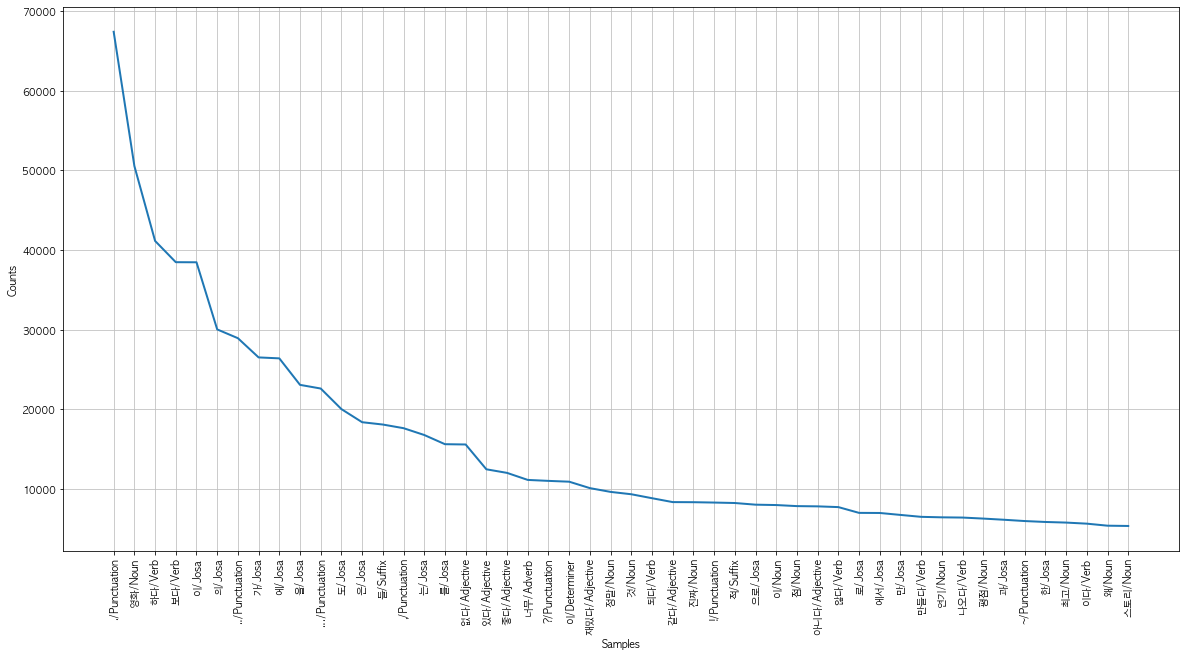

In [42]:
plt.figure(figsize=(20,10))
text.plot(50)

In [43]:
# 시간 관계상 100개만
FREQUENCY_COUNT = 100

In [44]:
selected_words = [f[0] for f in text.vocab().most_common(FREQUENCY_COUNT)]

In [45]:
def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [46]:
x_train = [term_frequency(d) for d, _ in train_docs]
x_test = [term_frequency(d) for d, _ in test_docs]

In [47]:
y_train = [c for _, c in train_docs]
y_test = [c for _, c in test_docs]

In [51]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

### 모델링

In [54]:
#레이어 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [55]:
#학습 프로세스 설정
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.binary_accuracy]
    )

/Users/cho2jiwoo/opt/anaconda3/envs/dfgakgjalk/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [56]:
#학습 데이터로 학습
model.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
286/286 [==============================] - 2s 4ms/step - loss: 0.5652 - binary_accuracy: 0.6921
Epoch 2/10
286/286 [==============================] - 1s 2ms/step - loss: 0.5327 - binary_accuracy: 0.7120
Epoch 3/10
286/286 [==============================] - 1s 2ms/step - loss: 0.5243 - binary_accuracy: 0.7173
Epoch 4/10
286/286 [==============================] - 1s 2ms/step - loss: 0.5183 - binary_accuracy: 0.7218
Epoch 5/10
286/286 [==============================] - 1s 2ms/step - loss: 0.5137 - binary_accuracy: 0.7256
Epoch 6/10
286/286 [==============================] - 1s 2ms/step - loss: 0.5102 - binary_accuracy: 0.7276
Epoch 7/10
286/286 [==============================] - 1s 2ms/step - loss: 0.5070 - binary_accuracy: 0.7296
Epoch 8/10
286/286 [==============================] - 0s 2ms/step - loss: 0.5043 - binary_accuracy: 0.7318
Epoch 9/10
286/286 [==============================] - 0s 2ms/step - loss: 0.5020 - binary_accuracy: 0.7336
Epoch 10/10
286/286 [================

### 모델 평가

In [57]:
results = model.evaluate(x_test, y_test)

1537/1537 [==============================] - 1s 814us/step - loss: 0.5212 - binary_accuracy: 0.7192


In [60]:
print(f'accuracy: {results[1]}')

accuracy: 0.7192115187644958


### 새로운 영화 리뷰 데이터로 감성 예측

In [74]:
def predict_review(review):
    token = tokenize(review)
    tfq = term_frequency(token)
    data = np.expand_dims(np.asarray(tfq).astype('float32'), axis=0)
    score = float(model.predict(data))
    if 0.7 <= score <= 1:
        return 1
    elif 0.3 <= score < 0.7:
        return 0
    else:
        return -1

In [86]:
movie_data = pd.read_csv('data/movie_data.csv', header=None, usecols=[0])
movie_data.columns = ['review']
movie_data.head()

,review
0,오~~ 종합선물셋트
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...
2,이제 남은건타노스 밖에
3,타노스는 발암물질이다.
4,정말재미있게봤습니다


In [87]:
predict_sample_reviews = movie_data.head(10)

In [88]:
predict_sample_reviews

,review
0,오~~ 종합선물셋트
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...
2,이제 남은건타노스 밖에
3,타노스는 발암물질이다.
4,정말재미있게봤습니다
5,"괜찮았음. 그런데 도끼자루의 그루트목재는 도끼힘을 감당하는데, 타노스한테는 훕! 한..."
6,개인적으론 명작이라고 생각함.
7,재밌어요.ㅎ
8,혼란 그리고 혼란
9,재밌게 봤습니다!역시 마블영화!


In [92]:
sentiment = [predict_review(x) for x in predict_sample_reviews['review']]
sentiment

[0, 1, 0, 0, 1, 0, 0, 1, 0, 1]

In [91]:
sentiment_df = pd.DataFrame(sentiment, columns=['sentiment'])
predict_sample_reviews.join(sentiment_df)

,review,sentiment
0,오~~ 종합선물셋트,0
1,크레딧 올라올때부터 충격먹었어요 ㅋㅋㅋㅋ 나중에 더큰 활약기대하겠습니다! 와칸다포에...,1
2,이제 남은건타노스 밖에,0
3,타노스는 발암물질이다.,0
4,정말재미있게봤습니다,1
5,"괜찮았음. 그런데 도끼자루의 그루트목재는 도끼힘을 감당하는데, 타노스한테는 훕! 한...",0
6,개인적으론 명작이라고 생각함.,0
7,재밌어요.ㅎ,1
8,혼란 그리고 혼란,0
9,재밌게 봤습니다!역시 마블영화!,1


reference: https://devtimes.com/nlp-korea-movie-review